In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("C:\\Users\\manish singh\\OneDrive\\Desktop\\exl_database\\Expanded_data_with_more_features.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.shape

(30641, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
# Droping Unnamed:0 column:

df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [11]:
numerical=[]
categorical=[]

for col in df:
    if df[col].dtype=='O':
        categorical.append(col)
    else:
        numerical.append(col)

In [12]:
print(categorical)
print()
print(numerical)

['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']


# <center>===Handling Missing Values===<center>

# on categorical columns

In [13]:
df[categorical].isnull().mean()*100

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
TransportMeans         10.228126
WklyStudyHours          3.116739
dtype: float64

In [14]:
#Droping nan values lower than 4%

columns_drop=["ParentMaritalStatus","PracticeSport","IsFirstChild","WklyStudyHours"]

df=df.dropna(subset=columns_drop)


In [15]:
df[categorical].isnull().mean()*100

Gender                  0.000000
EthnicGroup             5.909695
ParentEduc              5.957651
LunchType               0.000000
TestPrep                5.968718
ParentMaritalStatus     0.000000
PracticeSport           0.000000
IsFirstChild            0.000000
TransportMeans         10.222075
WklyStudyHours          0.000000
dtype: float64

In [16]:
cat_missing_cols=['EthnicGroup','ParentEduc','TestPrep','TransportMeans']

# <center>Mode Imputation<center>

In [17]:
def randomvalueimpuation_cat(data,columns):
    df=data
    for col in columns:
        non_missing=df[col].dropna().values
        df[col]=df[col].apply(lambda x:np.random.choice(non_missing)if pd.isnull(x) else x)

In [18]:
randomvalueimpuation_cat(df,cat_missing_cols)

In [19]:
df[categorical].isnull().mean()

Gender                 0.0
EthnicGroup            0.0
ParentEduc             0.0
LunchType              0.0
TestPrep               0.0
ParentMaritalStatus    0.0
PracticeSport          0.0
IsFirstChild           0.0
TransportMeans         0.0
WklyStudyHours         0.0
dtype: float64

# On numerical columns

In [20]:
df[numerical].isnull().mean()*100

NrSiblings      5.12026
MathScore       0.00000
ReadingScore    0.00000
WritingScore    0.00000
dtype: float64

In [21]:
num_missing_col=['NrSiblings']

In [22]:
def randomvalueimputation(data,columns):
    data=df
    for col in columns:
        missing=df[col].isnull().sum()
        
        pool = df[col].dropna().sample(missing).values
        
        df[col][df[col].isnull()]=pool

In [23]:
randomvalueimputation(df,num_missing_col)

C:\Users\manish singh\AppData\Local\Temp\ipykernel_22288\3255328358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col].isnull()]=pool


In [24]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [25]:
df.shape

(27108, 14)

# <center>===Handling Outliers===<center>

In [26]:
outliers_cols=['NrSiblings','MathScore','ReadingScore','WritingScore']

In [27]:
def iqr_method(data,columns):
    data=df
    for col in columns:
        p25=df[col].quantile(0.25)
        p75=df[col].quantile(0.75)



        iqr=p75-p25
        uf=p75+1.5*iqr
        lf=p25-1.5*iqr

        df[(df[col]>uf) | (df[col]<lf)]

        df[(df[col]<uf) & (df[col]>lf)]

        df[col]=np.where(df[col]>uf,uf,np.where(df[col]<lf,lf,df[col]))

In [28]:
iqr_method(df,outliers_cols)

In [29]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,female,group C,some college,standard,completed,married,sometimes,yes,0.0,private,5 - 10,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,private,5 - 10,45.0,56.0,42.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76.0,78.0,75.0


# <center>====Visualising the data=====<center>

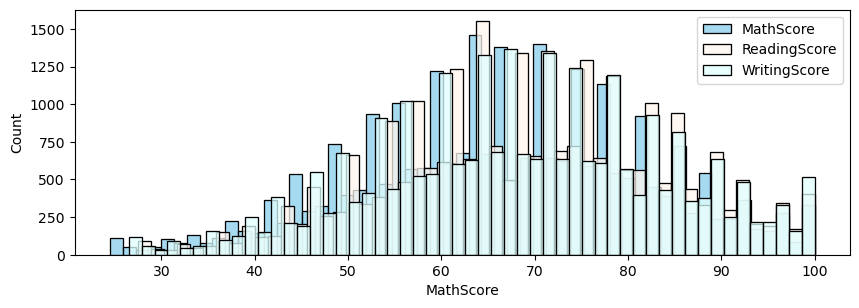

In [30]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,2)
sns.histplot(df['MathScore'],color='skyblue',label='MathScore')
plt.legend()

plt.subplot(2,1,2)
sns.histplot(df['ReadingScore'],color='seashell',label='ReadingScore')
plt.legend()

plt.subplot(2,1,2)
sns.histplot(df['WritingScore'],color='lightcyan',label='WritingScore')
plt.legend()


We can say that most of the students have score between <b>65 to 70</b> in all three tests that are <b>math,reading and writing </b>.

But less students have scored <b>100 marks</b> in <b>MathTest</b> as compare to <b>Reading and writing Test</b>.

And
 <br><b>Average score in MathsTest=66</b>
 <br><b>Average score in WritingTest=68</b>
 <br><b>Average score in ReadingTest=69</b>.


In [71]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,27108.000000,27108.000000,27108.000000,27108.000000
mean,2.144865,66.571732,69.411355,68.449572
std,1.428439,15.269654,14.684874,15.368299
min,0.000000,24.500000,27.500000,26.500000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,77.000000,80.000000,79.000000
max,6.000000,100.000000,100.000000,100.000000


# <center>On the basis of Gender<center>

In [31]:
val=df['Gender'].value_counts().values

In [32]:
index=df['Gender'].value_counts().index

In [33]:
colors=['skyblue','lightcyan']

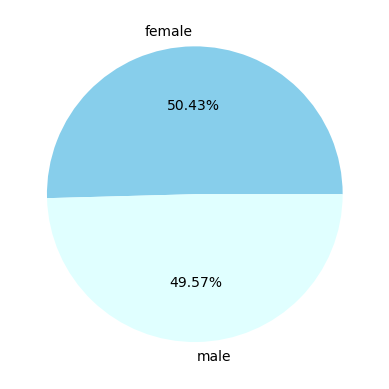

In [34]:
plt.pie(x=val,labels=index,autopct='%1.2f%%',colors=colors)
plt.show()

In [35]:
grp_Gen=df.groupby('Gender').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [36]:
round(grp_Gen,2)

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.14,72.91,72.90
male,69.05,65.86,63.92


<Axes: ylabel='Gender'>

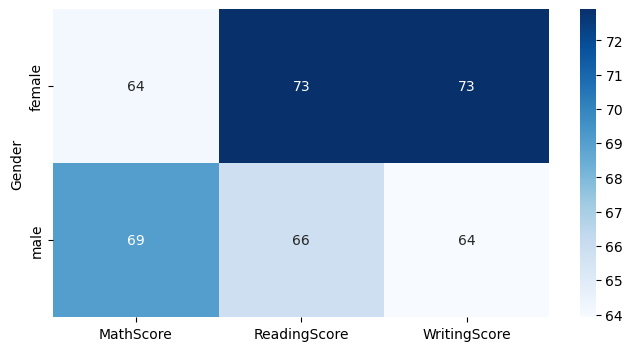

In [37]:
plt.figure(figsize=(8,4))
sns.heatmap(round(grp_Gen,2),annot=True,cmap='Blues')

Number of both <b>male and female</b> students  are almost equal .
<br> And Female students have scored higher as compare to male students  in <b>Reading and Writing</b>. but male students have high score in <b>Maths</b> than female.

# <center>On the basis of parentMaritalStatus<center>

In [38]:
val_pms=df['ParentMaritalStatus'].value_counts().values

In [39]:
index_pms=df['ParentMaritalStatus'].value_counts().index

In [40]:
colors=['skyblue','lightcyan','seashell','grey']

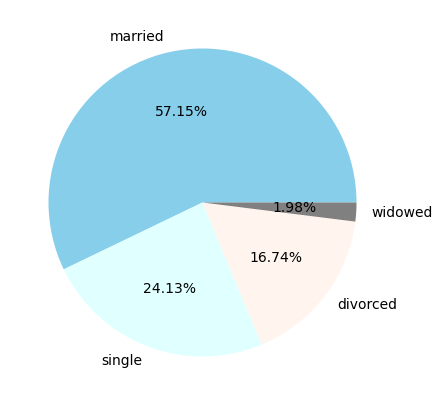

In [41]:
plt.figure(figsize=(5,5))
plt.pie(x=val_pms,labels=index_pms,autopct='%1.2f%%',colors=colors)
plt.show()

In [42]:
grp_pms=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [43]:
round(grp_pms,2)

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.73,69.70,68.81
married,66.64,69.38,68.40
single,66.22,69.25,68.29
widowed,67.39,69.70,68.59


<Axes: ylabel='ParentMaritalStatus'>

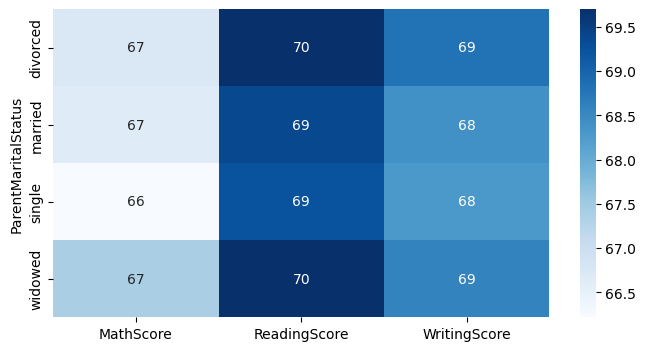

In [44]:
plt.figure(figsize=(8,4))
sns.heatmap(round(grp_pms,2),annot=True,cmap='Blues')

<b>Marital Status of Parents </b>does not affect the scores of students. As all students have almost same average of marks in all three test.

# <center>On the basis of ParentEduc<center>

C:\Users\manish singh\AppData\Local\Temp\ipykernel_22288\880215384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df,x='ParentEduc',palette='Blues')


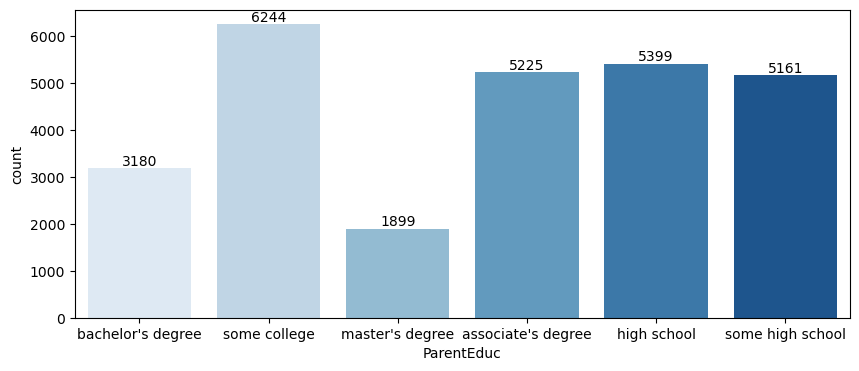

In [66]:
plt.figure(figsize=(10,4))
ax=sns.countplot(df,x='ParentEduc',palette='Blues')
for bar in ax.containers:
    ax.bar_label(bar)

In [67]:
grp_pe=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [68]:
round(grp_pe,2)

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.34,71.15,70.30
bachelor's degree,70.15,72.81,73.02
high school,64.58,67.44,65.71
master's degree,71.89,75.39,75.80
some college,66.50,69.21,68.55
some high school,62.80,65.66,63.81


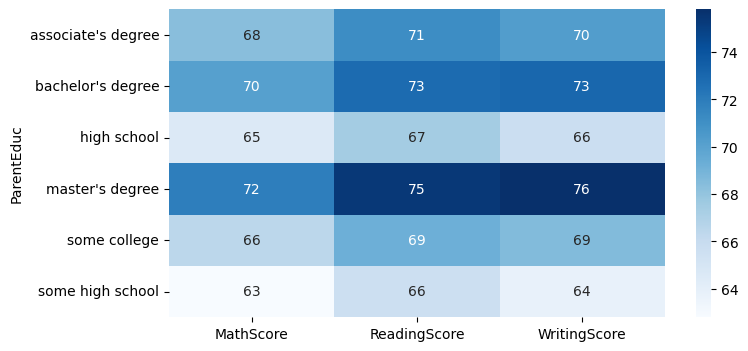

In [69]:
plt.figure(figsize=(8,4))
sns.heatmap(round(grp_pe,2),annot=True,cmap='Blues')
plt.show()

Parent's Education plays a major role in students scores. Students whose parents have <b>Master's,Bachelor's and Associate's degrees</b> have higher scores as compare to students whose parents have lower education.

Students whose parents have <b>Master's degrees</b> have the highest scores in all three tests.

# <center>On the basis of PracticeSport<center>

C:\Users\manish singh\AppData\Local\Temp\ipykernel_22288\1512404534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df,x='PracticeSport',palette='Blues')


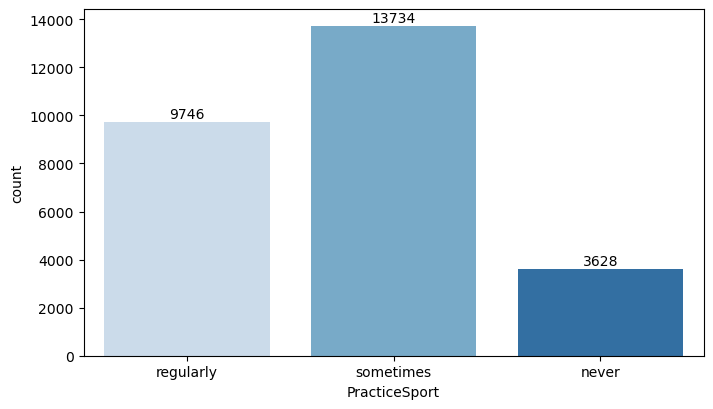

In [45]:
plt.figure(figsize=(8,4.5))
ax=sns.countplot(df,x='PracticeSport',palette='Blues')
for bar in ax.containers:
    ax.bar_label(bar)   

In [46]:
grp_ps=df.groupby('PracticeSport').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [47]:
round(grp_ps,2)

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.24,68.42,66.60
regularly,67.78,69.93,69.60
sometimes,66.33,69.31,68.12


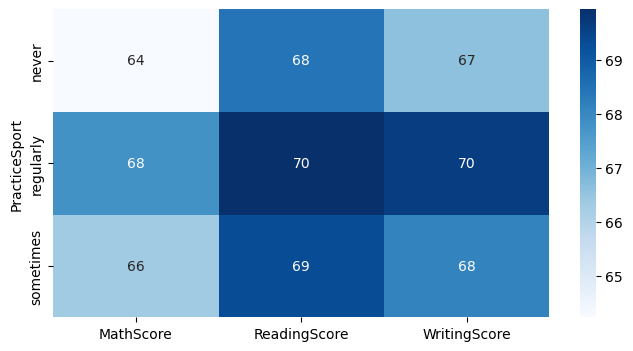

In [48]:
plt.figure(figsize=(8,4))
sns.heatmap(round(grp_ps,2),annot=True,cmap='Blues')
plt.show()

Students who regularly involves in <b>Sports Activities</b> have higher score in all three tests as compare to those students who never or only sometimes involves in <b>Sports related activities</b>.

# <center>On the basis of IsFirstChild<center>

C:\Users\manish singh\AppData\Local\Temp\ipykernel_22288\105919973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df,x='IsFirstChild',palette='Blues')


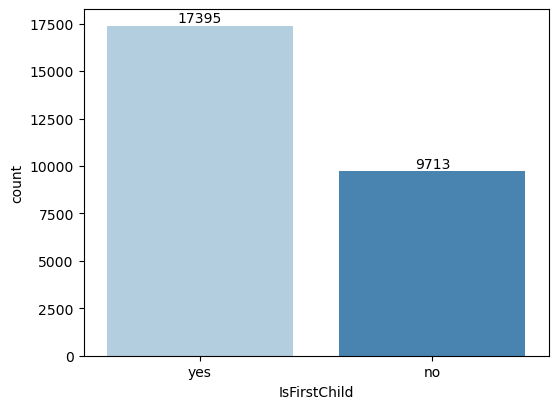

In [49]:
plt.figure(figsize=(6,4.5))
ax=sns.countplot(df,x='IsFirstChild',palette='Blues')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

In [50]:
grp_fc=df.groupby('IsFirstChild').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [51]:
round(grp_fc,2)

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.26,69.16,68.25
yes,66.75,69.55,68.56


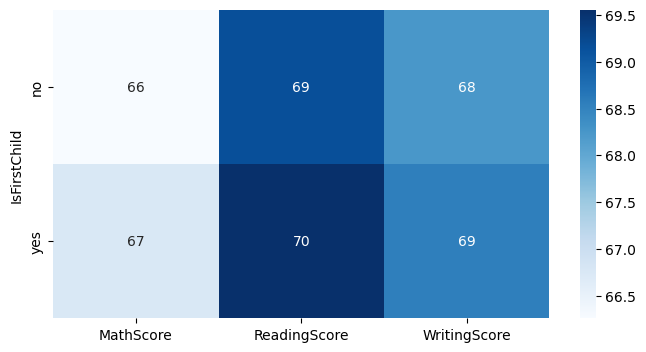

In [52]:
plt.figure(figsize=(8,4))
sns.heatmap(round(grp_fc,2),annot=True,cmap='Blues')
plt.show()

Most of the stuudents are <b>first child</b> but that feature does not affect there score in tests. students have almost same average scores in all three tests.

# <center>On the basis of NrSiblings<center>

C:\Users\manish singh\AppData\Local\Temp\ipykernel_22288\3252605737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df,x='NrSiblings',palette='Blues')


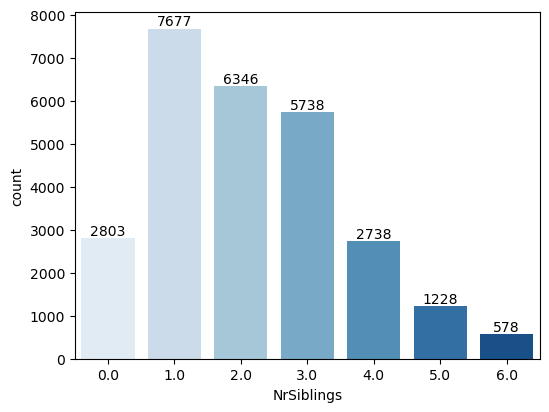

In [53]:
plt.figure(figsize=(6,4.5))
ax=sns.countplot(df,x='NrSiblings',palette='Blues')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

In [54]:
grp_ns=df.groupby('NrSiblings').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [55]:
round(grp_ns,2)

,MathScore,ReadingScore,WritingScore
NrSiblings,,,
0.0,66.88,69.68,68.88
1.0,66.50,69.31,68.30
2.0,66.48,69.44,68.45
3.0,66.71,69.51,68.61
4.0,66.28,69.15,68.12
5.0,66.56,69.34,68.25
6.0,67.03,69.57,68.80


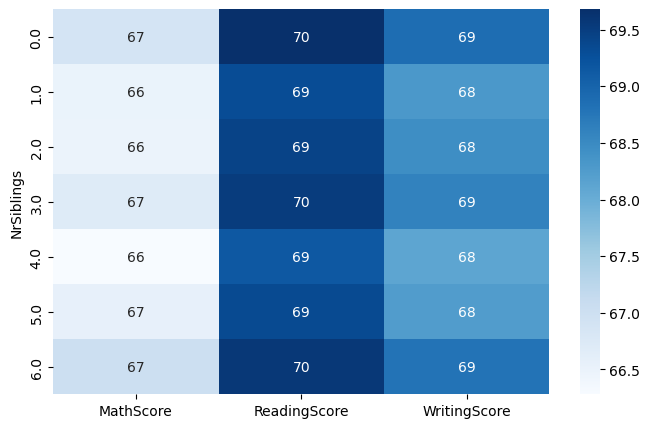

In [56]:
plt.figure(figsize=(8,5))
sns.heatmap(round(grp_ns,2),annot=True,cmap='Blues')
plt.show()

Most of the students have <b>1 or 2 number of Siblings</b> .But number of <b>Siblings</b> does not affect their score as all students have some average scores in all three tests

# <center>On the basis of WklyStudyHours<center>

C:\Users\manish singh\AppData\Local\Temp\ipykernel_22288\3840212345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df,x='WklyStudyHours',palette='Blues')


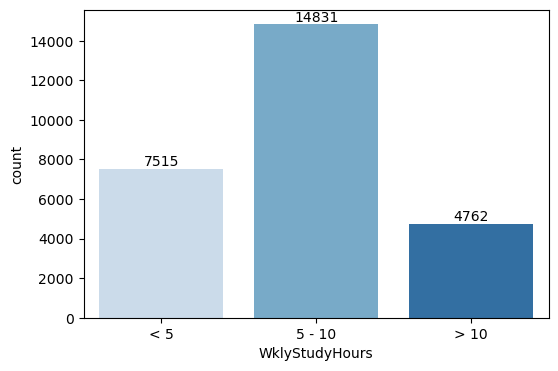

In [57]:
plt.figure(figsize=(6,4))
ax=sns.countplot(df,x='WklyStudyHours',palette='Blues')
for bar in ax.containers:
    ax.bar_label(bar)

In [58]:
grp_wsh=df.groupby('WklyStudyHours').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [59]:
round(grp_wsh,2)

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.86,69.65,68.63
< 5,64.56,68.23,67.15
> 10,68.84,70.52,69.94


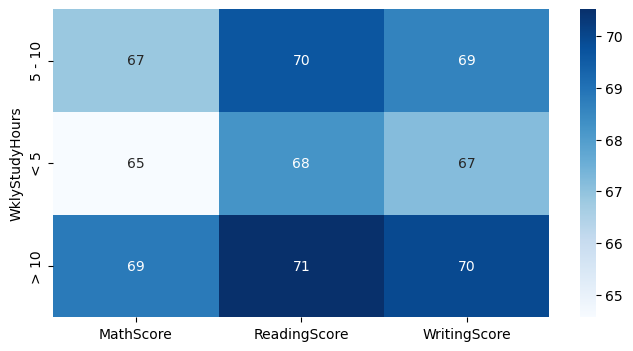

In [60]:
plt.figure(figsize=(8,4))
sns.heatmap(round(grp_wsh,2),annot=True,cmap='Blues')
plt.show()

Majority of the students study for <b>5 to 10 hours</b> only and less students study more than <b>10 hours</b>. Study Hours directly affect their tests score.

Students who study more than <b>10 hours</b> have higher scores than students who study less than <b>10 hours</b>.


# <center>On the basis of EthnicGroup<center>

C:\Users\manish singh\AppData\Local\Temp\ipykernel_22288\1220141669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(pd.DataFrame(df['EthnicGroup'].sort_values()),x='EthnicGroup',palette='Blues')


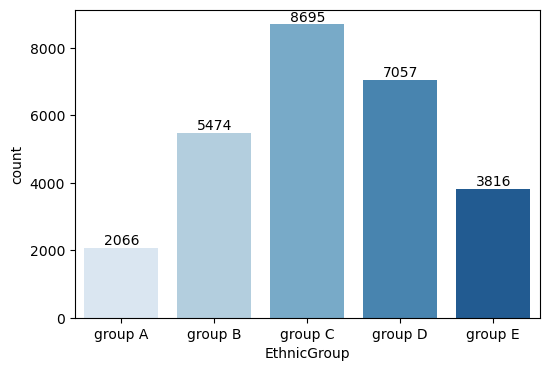

In [87]:
plt.figure(figsize=(6,4))
ax=sns.countplot(pd.DataFrame(df['EthnicGroup'].sort_values()),x='EthnicGroup',palette='Blues')
for bar in ax.containers:
    ax.bar_label(bar)

In [62]:
grp_eg=df.groupby('EthnicGroup').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

In [63]:
round(grp_eg,2)

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,63.07,66.89,65.36
group B,63.59,67.32,65.91
group C,64.75,68.53,67.10
group D,67.71,70.37,70.78
group E,74.79,74.03,72.52


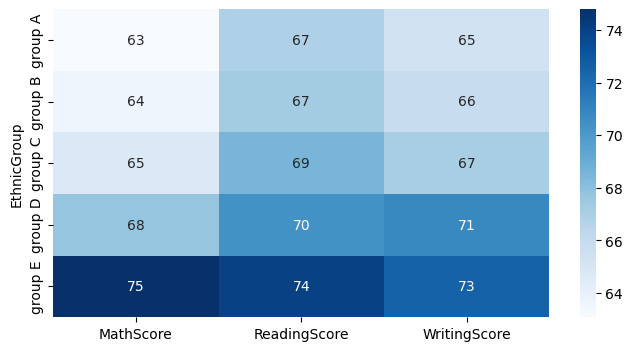

In [64]:
plt.figure(figsize=(8,4))
sns.heatmap(round(grp_eg,2),annot=True,cmap='Blues')
plt.show()

Majority of the students are from <b>Ethnic Group C and D</b> and minority from <b>Group E and A</b>.
<br>But students who are from <b>Group E</b> have the highest scores in all three tests.where as <b>Group A and B</b> students have the lowest scores in all tests.
<br>And students of <b>Group C and D</b> have decent scores as compare to others.